## A Brief Enquiry Into Fandango's Rating System

In late 2015, a report by Walt Hickey concluded that Fandango's rating system was biased. Fandango has a 5 star rating system and Hickey's analysis showed that Fandango's system was almost always rounding up the rating to the nearest half stars. A haldful of ratings were rounded up to the nearest whole star and there was even a movie with a rating of 4 which was rounded up to a 5. Hieckey's report was based on the ratings displayed on the website and the actual ratings which he obtained from the HTML of the page. Fandango commented on the situation claiming that these discrepencies were not intentional and that they were due to a bug in their system. They promised to fix the bug as soon as possible.

This project aims to check whether Fandango kept the promise they made.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
ratings_bf = pd.read_csv('fandango_score_comparison.csv')
ratings_af = pd.read_csv('movie_ratings_16_17.csv')

fandango_bf = ratings_bf[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_af = ratings_af[['movie', 'year', 'fandango']].copy()

Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year. Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

'fandango_score_comparison.csv' includes data which were sampled under the follwing criteria: 
* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
* The movie must have had tickets on sale in 2015.

It's apparent that the sampling was not random and not every movie had the same chance of being included. So, the sample is not representative of the population we want to describe.

'movie_ratings_16_17.csv' includes data which were sampled under the follwing criteria:
* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews.
this sample is also not representative of the population we want to describe.

### Changing the Goal

We can make a slight tweak to our goal so that the data we already have can become representative of the population of our interest. Instead of checking whether there has been changes to the rating system, we will determine if there are any differences between the ratings of popular movies in 2015 and popular movies in 2016 on the website.

With that being said, we now have 2 populations of interest:
* All Fandango's ratings for popular movies released in 2015.
* All Fandango's ratings for popular movies released in 2016.

The term popular is vague and we need to define what it means in the context of this study. Hickey's original study(and fandango_bf) included movies with at least 30 fan ratings and therefore we will set that as a benchmark for being considered popular.

### Checking second dataset for popular movies

Now, we need to check if our second dataset, the one that includes rating for movies released in 2016 contain 'popular' movies.

In [61]:
fandango_af.sample(n=10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


After quickly check the number of ratings for these particular movies from the website ourselves, we can see that 9/10 movies from these sample can be considered popular. Therefore, we can go forward working with this dataset. 

### Isolating the datasets

In [62]:
fandango_bf.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [73]:
fandango_bf['year'] = fandango_bf['FILM'].str[-5:-1]

In [74]:
fandango_bf['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [75]:
fandango_15 = fandango_bf[fandango_bf['year'] == '2015']

In [66]:
fandango_af['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [77]:
fandango_16 = fandango_af[fandango_af['year'] == 2016]

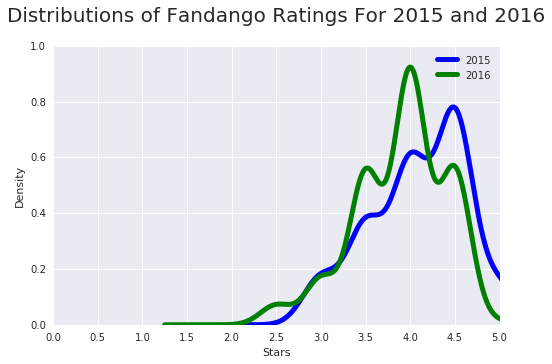

In [165]:
fig = plt.figure(figsize = (8,5))
fandango_15['Fandango_Stars'].plot.kde(color = 'blue', linewidth = 5, label = '2015', legend = True)
fandango_16['fandango'].plot.kde(color = 'green', linewidth = 5, label = '2016', legend = True)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.5,0.5))
plt.title('Distributions of Fandango Ratings For 2015 and 2016',fontsize=20, y = 1.07)


Both the distributions are strongly left skewed. The 2016 distribution has a small shift to the right relative to 2015. This could mean that the ratings for popular movies in 2016 were slightly lower in comparison to 2015.

Overall, the strong left skew shows that most popular movies on the site are highly rated.

In [103]:
fandango_15['Fandango_Stars'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [106]:
fandango_16['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

As the 2 datasets have different number of movies, it's better to study the relative frequencies.

In [111]:
fandango_15['Fandango_Stars'].value_counts(normalize = True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [112]:
fandango_16['fandango'].value_counts(normalize = True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

There is a significant decrease in the amount of movies that recieved very high ratings. In 2016, only around 0.5% recieved the perfect score where as this number was close to 7% in the previous year. The percentage of movies that recieved 4.5 and 4 stars fell by around 13% and 5 % respectively.

Popular movies in 2015 recieved no rating below 3 stars where as in 2016, just over 3% recieved 2.5 stars.

However, there was an increase in the amount of movies that recied 3 and 3.5 stars.

In [113]:
a = 38-25
a

13

In [123]:
mean15 = fandango_15['Fandango_Stars'].mean()
median15 = fandango_15['Fandango_Stars'].median()
mode15 = fandango_15['Fandango_Stars'].mode()[0]

mean16 = fandango_16['fandango'].mean()
median16 = fandango_16['fandango'].median()
mode16 = fandango_16['fandango'].mode()[0]

sumstats = pd.DataFrame()
sumstats['2015'] = [mean15, median15, mode15]
sumstats['2016'] = [mean16, median16, mode16]
sumstats.index = ['mean', 'median', 'mode']
sumstats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


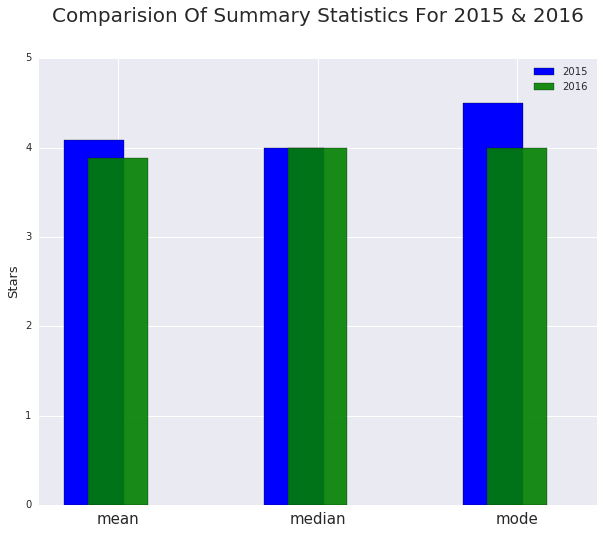

In [171]:
fig = plt.figure(figsize = (10,8))
sumstats['2015'].plot.bar(color = 'blue', label = '2015', legend = True, width = 0.3, position = 0.9)
sumstats['2016'].plot.bar(color = 'green', label = '2016', legend = True, width = 0.3, alpha = 0.9)
plt.ylim(0,5)
plt.ylabel('Stars', fontsize=13)
plt.xticks(rotation = 0,fontsize=15)
plt.title('Comparision Of Summary Statistics For 2015 & 2016', fontsize=20, y = 1.07)

The mean rating for 2016 was slightly lower and the median rating for both years were the same. However, the mode rating in 2016 was considerably lower.

### Conclusion

Based on the analysis conducted here, we can say that the ratings for popular movies were lower than for those in 2015. Fandango may have fixed the bug as they promised. Another explanation for the dip in rating could be that movies released in 2016 were genuinely worse than those from 2015.